In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [6]:
# ! mkdir myTestCases
for i in range(12):
    # get p,q,r random numbers betwern 1, 1<<12
    p = np.random.randint(1, 1<<12)
    q = np.random.randint(1, 1<<12)
    r = np.random.randint(1, 1<<12)
    # generate a (pxq), b (qxr) matrices with values between 0, 10**3
    a = np.random.randint(0, 10**3, (p,q))
    b = np.random.randint(0, 10**3, (q,r))
    # make testcases for matrix multiplication
    # make input(i)
    # print p, q, r in first line
    # print a in next p lines
    # print b in next q lines
    # make output(i)
    # print p, r in first line
    # print c in next p lines
    # save input(i) and output(i) in myTestCases
    f = open("myTestCases/input"+str(i)+".txt", "w")
    f.write(str(p)+" "+str(q)+" "+str(r)+"\n")
    for row in a:
        f.write(" ".join(map(str, row))+"\n")
    for row in b:
        f.write(" ".join(map(str, row))+"\n")
    f.close()
    f = open("myTestCases/output"+str(i)+".txt", "w")
    c = np.matmul(a,b)
    # f.write(str(p)+" "+str(r)+"\n")
    for row in c:
        f.write(" ".join(map(str, row))+"\n")
    f.close()


In [3]:
mallocShared = np.zeros((3, 5))
mallocHost = np.zeros((3, 5))
mallocDeviceHost = np.zeros((3, 5))
buffers = np.zeros((3, 5))

buffers[0] = [170, 169, 169, 170, 170]
buffers[1] = [1265, 1270, 1274, 1272, 1274]
buffers[2] = [10795, 10797, 10804, 10789, 10788]

mallocShared[0] = [165, 164, 167, 166, 164]
mallocShared[1] = [1258, 1264, 1266, 1255, 1261]
mallocShared[2] = [10732, 10719, 10735, 10726, 10734]

mallocHost[0] = [165, 164, 165, 164, 164]
mallocHost[1] = [1254, 1250, 1259, 1259, 1263]
mallocHost[2] = [10711, 10721, 10730, 10739, 10757]

mallocDeviceHost[0] = [165, 163, 166, 164, 166]
mallocDeviceHost[1] = [1270, 1264, 1270, 1264, 1266]
mallocDeviceHost[2] = [10754, 10688, 10727, 10699, 10770]


In [4]:
# average for each method for test Case 6,7,8
# make a 4x3 matrix
average = np.zeros((4, 3))
average[0] = [np.mean(buffers[0]), np.mean(buffers[1]), np.mean(buffers[2])]
average[1] = [np.mean(mallocShared[0]), np.mean(mallocShared[1]), np.mean(mallocShared[2])]
average[2] = [np.mean(mallocHost[0]), np.mean(mallocHost[1]), np.mean(mallocHost[2])]
average[3] = [np.mean(mallocDeviceHost[0]), np.mean(mallocDeviceHost[1]), np.mean(mallocDeviceHost[2])]

# print using pandas by giving column and row names
print("Average time for each method in milliseconds for test Case 6,7,8")
df = pd.DataFrame(average, columns=['Test Case 6', 'Test Case 7', 'Test Case 8'], index=['Buffers', 'MallocShared', 'MallocHost', 'MallocDeviceHost'])
# in HTML table format
display(df)

Average time for each method in milliseconds for test Case 6,7,8


,Test Case 6,Test Case 7,Test Case 8
Buffers,169.6,1271.0,10794.6
MallocShared,165.2,1260.8,10729.2
MallocHost,164.4,1257.0,10731.6
MallocDeviceHost,164.8,1266.8,10727.6


In [5]:
cpu = np.zeros((6, 3))
cpu[0] = [0, 0, 0]
cpu[1] = [0, 0, 0]
cpu[2] = [5, 5, 5]
cpu[3] = [48, 50, 51]
cpu[4] = [493, 513, 513]
cpu[5] = [4116, 4103, 4053]

gpu = np.zeros((6, 3))
gpu[0] = [48, 47, 47]
gpu[1] = [47, 47, 46]
gpu[2] = [47, 47, 48]
gpu[3] = [50, 50, 49]
gpu[4] = [65, 61, 62]
gpu[5] = [166, 165, 166]

Average time for CPU and GPU for test Case 1,2,3,4,5,6


,Test Case 1,Test Case 2,Test Case 3,Test Case 4,Test Case 5,Test Case 6
CPU,0.000000,0.000000,5.000000,49.666667,506.333333,4090.666667
GPU,47.333333,46.666667,47.333333,49.666667,62.666667,165.666667


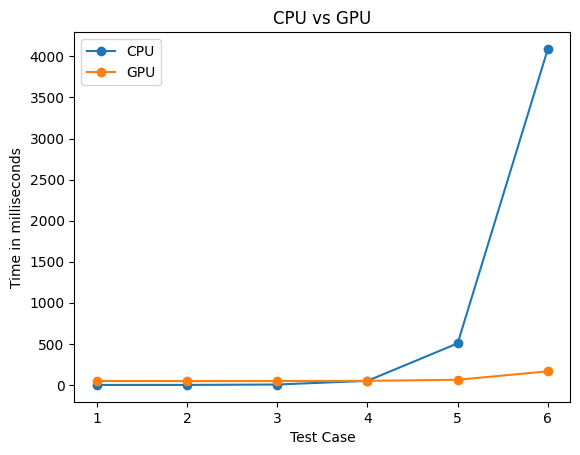

In [6]:
# average for each method for test Case 1,2,3,4,5,6
# make a 2x6 matrix
average = np.zeros((2, 6))
average[0] = [np.mean(cpu[0]), np.mean(cpu[1]), np.mean(cpu[2]), np.mean(cpu[3]), np.mean(cpu[4]), np.mean(cpu[5])]
average[1] = [np.mean(gpu[0]), np.mean(gpu[1]), np.mean(gpu[2]), np.mean(gpu[3]), np.mean(gpu[4]), np.mean(gpu[5])]
# print using pandas by giving column and row names
print("Average time for CPU and GPU for test Case 1,2,3,4,5,6")
df = pd.DataFrame(average, columns=['Test Case 1', 'Test Case 2', 'Test Case 3', 'Test Case 4', 'Test Case 5', 'Test Case 6'], index=['CPU', 'GPU'])
# in HTML table format
display(df)

# make a graph with x axis as test case and y axis as time
x = np.arange(1, 7)
plt.plot(x, average[0], label='CPU', marker='o')
plt.plot(x, average[1], label='GPU', marker='o')
plt.xlabel('Test Case')
plt.ylabel('Time in milliseconds')
plt.title('CPU vs GPU')
plt.legend()
plt.show()

Average time for MatMul and TiledMatMul for test Case 1,2,3,4,5,6,7,8


,MatMul,TiledMatMul
Test Case 1,48.0,73.0
Test Case 2,48.0,71.0
Test Case 3,48.0,72.0
Test Case 4,50.0,73.0
Test Case 5,63.0,81.0
Test Case 6,166.0,150.0
Test Case 7,1239.0,876.0
Test Case 8,10701.0,7354.0


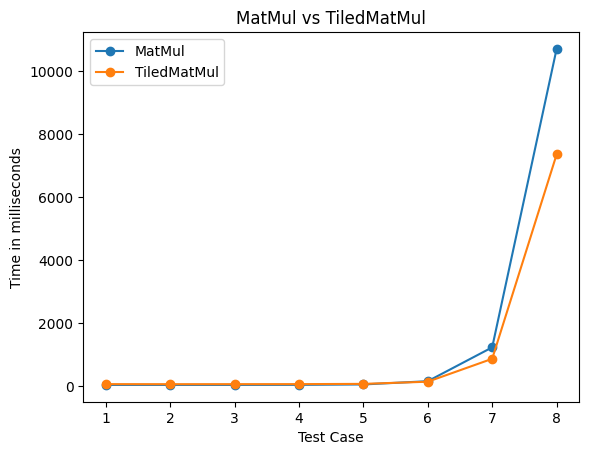

In [10]:
MatMul = np.zeros((1, 8))
TiledMatMul = np.zeros((1, 8))

TiledMatMul[0] = [73, 71, 72, 73, 81, 150, 876, 7354]
MatMul[0] = [48, 48, 48, 50, 63, 166, 1239, 10701]

data = {'MatMul': MatMul[0], 'TiledMatMul': TiledMatMul[0]}

print("Average time for MatMul and TiledMatMul for test Case 1,2,3,4,5,6,7,8")
df = pd.DataFrame(data, index=['Test Case 1', 'Test Case 2', 'Test Case 3', 'Test Case 4', 'Test Case 5', 'Test Case 6', 'Test Case 7', 'Test Case 8'])
# in HTML table format
display(df)

# make a graph with x axis as test case and y axis as time
x = np.arange(1, 9)
plt.plot(x, MatMul[0], label='MatMul', marker='o')
plt.plot(x, TiledMatMul[0], label='TiledMatMul', marker='o')
plt.xlabel('Test Case')
plt.ylabel('Time in milliseconds')
plt.title('MatMul vs TiledMatMul')
plt.legend()

